*********** 0
a_curr: 0.18
b_curr: 0.62
cost: 44.5
*********** 1
a_curr: 0.3192
b_curr: 1.0928
cost: 26.125199999999996
*********** 2
a_curr: 0.42724799999999996
b_curr: 1.453232
cost: 15.415974720000001
*********** 3
a_curr: 0.5115091199999999
b_curr: 1.7278860800000002
cost: 9.173875675392
*********** 4
a_curr: 0.5776057727999999
b_curr: 1.9370605952000002
cost: 5.535005374662449
*********** 5
a_curr: 0.6298300216319999
b_curr: 2.096250917888
cost: 3.413176576259893
*********** 6
a_curr: 0.6714583661260799
b_curr: 2.2172859146547204
cost: 2.1754130708415325
*********** 7
a_curr: 0.7049920439242751
b_curr: 2.309195511463117
cost: 1.4528476020487988
*********** 8
a_curr: 0.7323404723580026
b_curr: 2.3788729763057748
cost: 1.0305225365523307
*********** 9
a_curr: 0.7549612843324961
b_curr: 2.431580493177024
cost: 0.7831711501565299


Text(0.5, 0, 'Iteration')

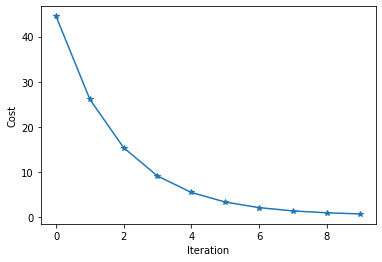

In [2]:
# Linear Regression ; Find Cost function by one Line

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

a_curr = b_curr =0
iteration =10
n = len(x)
learning_rate = 0.01
cost = []
iter = []

for i in range(iteration):
    print("***********",i)
    y_pred = a_curr + b_curr * x
    cost.append((1/(2 * n))* sum([val**2 for val in (y-y_pred)]))
    ad = -(2/n)*sum(y-y_pred)
    bd = -(2/n)*sum(x*(y-y_pred))
    a_curr = a_curr - learning_rate * ad
    b_curr = b_curr - learning_rate * bd
    print("a_curr:",a_curr)
    print("b_curr:",b_curr)
    print("cost:",cost[i])
    iter.append(i)

plt.plot(iter,cost, marker = '*')
plt.ylabel("Cost")
plt.xlabel("Iteration")

No handles with labels found to put in legend.


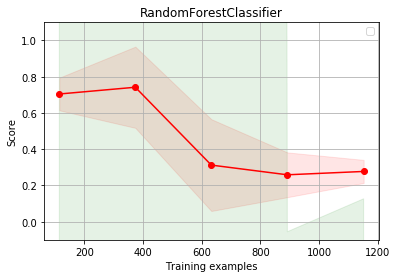

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

df = pd.read_csv("data.csv")

X_vals = df.iloc[:,0:5]
y_vals = df.iloc[:,-1]

lg = LinearRegression()
lg.fit(X_vals,y_vals)

from sklearn.model_selection import learning_curve

cv = 5

train_sizes, train_scores, test_scores = learning_curve(lg, X_vals, y_vals, n_jobs=-1, 
                                                        cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("RandomForestClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
    
# box-like grid
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show()

<Figure size 1080x2160 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

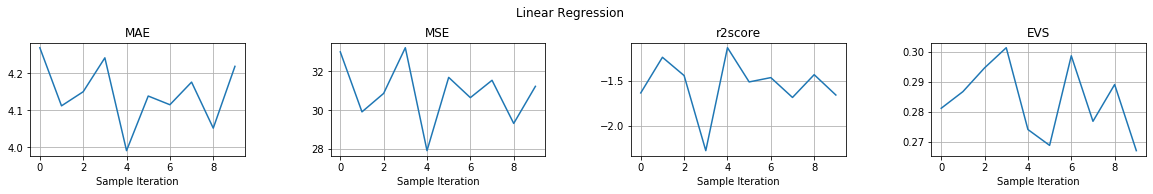

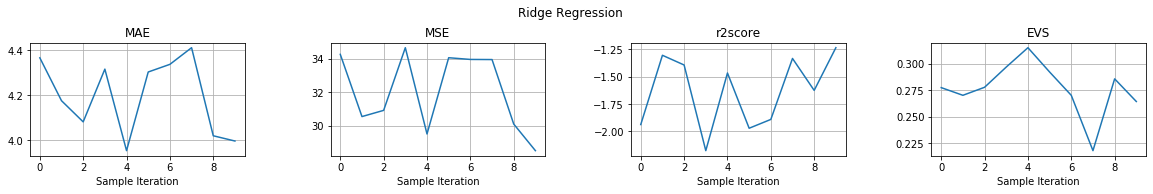

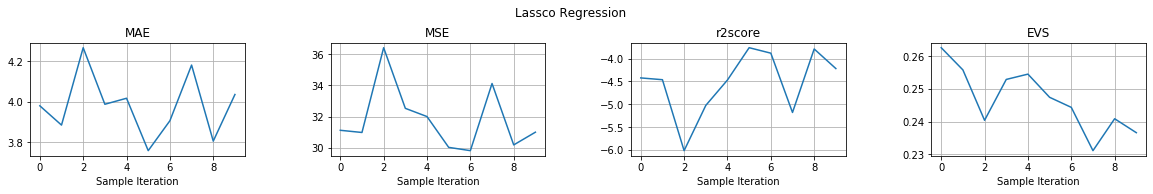

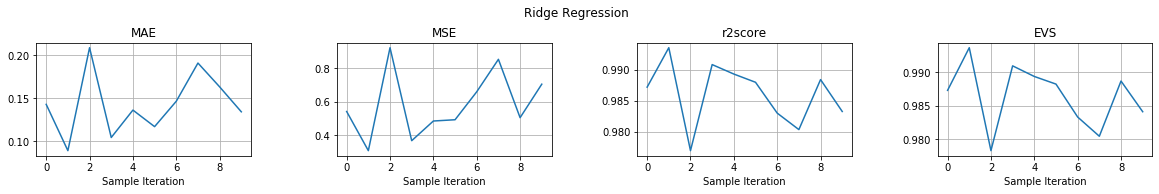

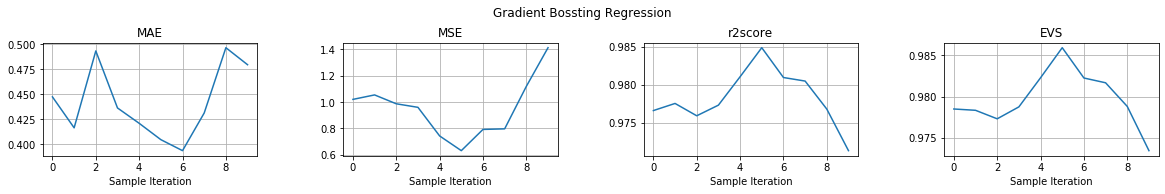

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv("data.csv")

X_vals = df.iloc[:,0:5]
y_vals = df.iloc[:,-1]

# Normalization
scaler = StandardScaler()
X_vals = scaler.fit_transform(X_vals)

def Addsubplots(fig,index,title,plotValues):
    ax = fig.add_subplot(2, 4, index)
    ax.set_title(title)
    ax.set_xlabel("Sample Iteration")
    ax.plot(range(10),plotValues)
    ax.grid()

from random import seed
from random import shuffle

fig = plt.figure(figsize=(15,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i =0

# lin_reg = RandomForestRegressor(n_estimators=100,random_state=0)
lin_reg = LinearRegression()
scores = []

models =[]

models.append(("Linear Regression",LinearRegression()))
models.append(("Ridge Regression",Ridge()))
models.append(("Lassco Regression",Lasso()))
models.append(("Ridge Regression",RandomForestRegressor(n_estimators=100,random_state=0)))
models.append(("Gradient Bossting Regression",GradientBoostingRegressor()))

i = 0
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for name,model in models:
    mae = []
    mse = []
    r2scores = []
    rmse = []
    evs = []
        
    for j in range(10):    
        # seed random number generato
        # prepare a sequence
        sequence = [i for i in range(1440)]
        #print(sequence)
        # randomly shuffle the sequence
        shuffle(sequence)
        train_index = sequence[0:1000]
        test_index = sequence[1000:1440]

        X_train = X_vals[train_index]
        X_test = X_vals[test_index]
        y_train = y_vals[train_index]
        y_test = y_vals[test_index]

        
        model_train = model.fit(X_train, y_train)
        y_pred = model_train.predict(X_test)
        
        mae.append(mean_absolute_error(y_test, y_pred))
        mse.append(mean_squared_error(y_test, y_pred))
        rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        r2scores.append(r2_score(y_pred,y_test))
        evs.append(explained_variance_score(y_test,y_pred))

    fig = plt.figure(figsize=(20,5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    fig.suptitle(name)

    Addsubplots(fig,1,"MAE",mae)
    
    Addsubplots(fig,2,"MSE",mse)
    
    Addsubplots(fig,3,"r2score",r2scores)
   
    Addsubplots(fig,4,"EVS",evs)